This is the first part of the code. This block allows us to download a dataset, in this case RSNA Pneumonia Detection Challenge (DICOM), and the CT-GAN (DICOM) datasets.

To begin, you must acquire a kaggle.json LEGACY API key. The steps to get that are:
1. Create a Kaggle account
2. Click your account on the top left and then "Settings"
3. Scroll down until you see "Legacy API Credentials" and then you want to click "Create Legacy API Key", this will give you a "kaggle.json" file

Afterwards, you will have to go to the RSNA dataset on Kaggle and accept the challenge. This can be found at:
- https://www.kaggle.com/c/rsna-pneumonia-detection-challenge

For the CT-GAN dataset, I was unable to download it from Kaggle through Google Colab, so I ended up downloading the zip file from Kaggle. The CT-GAN dataset I used is from:
- https://www.kaggle.com/datasets/ymirsky/medical-deepfakes-lung-cancer

If you download the dataset as a zip then you will have to upload the zip file to Google Drive and then allow Google Colab to have access to your drive. You WILL NEED ~6 GB of space avaliable in your google drive. So you will need to:
- Download the dataset from the above link
- Upload the zip file into your Google Drive (Need ~6 GB avaliable to upload)
- Once you finish uploading and run here, the code Google Colab will ask you to accept the connection between your Drive and Google Colab, just click continue and accept the boxes.

---

Once you've finished the above steps, you may now run the code block below. When you first run the code it will ask you to input your kaggle.json API key you downloaded earlier. It might also ask you to link your Google Drive and Google Colab, just accept and continue.

Everything should be good from there on, no more downloads, just waiting and confirming everything is moving smoothly.

The code is also very likely to change in the future, but the CT-GAN dataset is one that I know we are going to be using. One thing I do expect to change is the untampered dataset, but that should not cause any problems.

In [13]:
# Spring 2026 Capstone
# William Carroll
# Jessica Brown
# Sydney Halupa

# 1) Install required packages
!pip install -q pydicom scikit-learn scikit-image opencv-python pillow joblib pandas numpy kaggle

# 2) Upload kaggle.json
print("Upload kaggle.json")
from google.colab import files
uploaded = files.upload()

# 3) Move kaggle.json into the correct Kaggle config folder
!mkdir -p /root/.kaggle
!mv /content/kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

# 4) Test Kaggle authentication
!kaggle --version
!kaggle competitions list | head -n 5

# 5) Download RSNA Pneumonia Detection Challenge (DICOM)
!rm -rf /content/datasets/rsna
!mkdir -p /content/datasets/rsna

!kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content/datasets/rsna
!unzip -q "/content/datasets/rsna/*.zip" -d /content/datasets/rsna

print("\n Sample RSNA DICOM paths:")
!find /content/datasets/rsna -name "*.dcm" | head -n 10

print("\n RSNA folder contents:")
!ls -lah /content/datasets/rsna | head -n 30

# Upload CTGAN zip file from your computer
# NOTE: This is currently coming from WILLIAM's Google Drive, if you want to recreate the
#       tests, please go to (https://www.kaggle.com/datasets/ymirsky/medical-deepfakes-lung-cancer)
#       and download the zip file and upload it to your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

import os

ZIP_IN_DRIVE = "/content/drive/MyDrive/CTGAN.zip"
CTGAN_DIR = "/content/datasets/ctgan"

!rm -rf /content/datasets/ctgan
!mkdir -p /content/datasets/ctgan

print("Unzipping from Drive...")
!unzip -q "$ZIP_IN_DRIVE" -d "$CTGAN_DIR"

print("\nDone. Preview folders:")
!find /content/datasets/ctgan -maxdepth 3 -type d | head -n 40

print("\nSample DICOM files:")
!find /content/datasets/ctgan -type f -name "*.dcm" | head -n 20


Upload kaggle.json


Saving kaggle.json to kaggle.json
Kaggle API 1.7.4.5
ref                                                                              deadline             category                reward  teamCount  userHasEntered  
-------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3    2026-04-15 23:59:00  Featured         2,207,152 Usd       1552           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection         2026-02-13 23:59:00  Research           200,000 Usd        753           False  
https://www.kaggle.com/competitions/med-gemma-impact-challenge                   2026-02-24 23:59:00  Featured           100,000 Usd         57           False  
100% 3.65G/3.66G [01:28<00:00, 62.6MB/s]
100% 3.66G/3.66G [01:33<00:00, 42.3MB/s]

 Sample RSNA DICOM paths:
/content/datasets/rsna/stage

The purpose of the 2nd block of code is to show the amount of content within the two datasets that was previously downloaded. The main purpose of this block is to confirm everything downloaded correctly and was put in their respective folders.

In [2]:
# This section of code is meant to show how much content is within the dataset that was previously downloaded

import os
from glob import glob
from collections import Counter

# RSNA counts (DICOM)
rsna_train = glob("/content/datasets/rsna/stage_2_train_images/*.dcm")
rsna_test  = glob("/content/datasets/rsna/stage_2_test_images/*.dcm")

print("RSNA Train DICOM count:", len(rsna_train))
print("RSNA Test  DICOM count:", len(rsna_test))

# CT-GAN dataset total contents + file type breakdown
CTGAN_ROOT = "/content/datasets/ctgan"

# Grab ALL files recursively
ctgan_all_files = glob(os.path.join(CTGAN_ROOT, "**", "*"), recursive=True)
ctgan_all_files = [f for f in ctgan_all_files if os.path.isfile(f)]

# Count extensions
ext_counter = Counter()
for f in ctgan_all_files:
    ext = os.path.splitext(f)[1].lower()
    ext_counter[ext if ext else "(no extension)"] += 1

# Specifically count dicoms
ctgan_dicoms = [f for f in ctgan_all_files if f.lower().endswith(".dcm")]

print("\n==============================")
print("CT-GAN Dataset Summary")
print("==============================")
print("CT-GAN total files:", len(ctgan_all_files))
print("CT-GAN DICOM count:", len(ctgan_dicoms))

print("\nCT-GAN file type counts (by extension):")
for ext, count in ext_counter.most_common():
    print(f"  {ext:12} : {count}")

# Show where most DICOMs live (top folder breakdown)
top_folder_counter = Counter()
for f in ctgan_dicoms:
    rel = os.path.relpath(f, CTGAN_ROOT)
    top = rel.split(os.sep)[0]  # first folder level
    top_folder_counter[top] += 1

print("\nCT-GAN DICOM distribution by top-level folder:")
for folder, count in top_folder_counter.most_common():
    print(f"  {folder:25} : {count}")

# Quick sample paths
print("\nSample CT-GAN files:")
for p in ctgan_all_files[:10]:
    print(" ", p)

print("\nSample CT-GAN DICOM paths:")
for p in ctgan_dicoms[:10]:
    print(" ", p)



RSNA Train DICOM count: 26684
RSNA Test  DICOM count: 3000

CT-GAN Dataset Summary
CT-GAN total files: 22769
CT-GAN DICOM count: 22753

CT-GAN file type counts (by extension):
  .dcm         : 22753
  .csv         : 16

CT-GAN DICOM distribution by top-level folder:
  CT_Scans                  : 22753

Sample CT-GAN files:
  /content/datasets/ctgan/Response EXP2 - Reviewer 3_instances.csv
  /content/datasets/ctgan/Response EXP2 - Reviewer 2_patients.csv
  /content/datasets/ctgan/Response EXP2 - Reviewer 3_patients.csv
  /content/datasets/ctgan/Response EXP1 - Reviewer 2_instances.csv
  /content/datasets/ctgan/Response EXP2 - Reviewer 1_patients.csv
  /content/datasets/ctgan/Response EXP2 - Reviewer 1_instances.csv
  /content/datasets/ctgan/Response EXP1 - Reviewer 1_instances.csv
  /content/datasets/ctgan/labels_exp2.csv
  /content/datasets/ctgan/Response EXP1 - Reviewer 1_patients.csv
  /content/datasets/ctgan/Response EXP1 - Reviewer 2_patients.csv

Sample CT-GAN DICOM paths:
  /cont

The 3rd block of code is the fucntion that splits the tampered dataset (in this case the CT-GAN dataset) in to their respecive splits. As a general benchmark, I decided to go with:
- 70% Train
- 15% Validation
- 15% Test

I also added some validation at the end, so please make sure everyting looks good before testing it.

In [19]:
import os
import pandas as pd
from glob import glob
from sklearn.model_selection import train_test_split
import shutil

BASE_CTGAN = "/content/datasets/ctgan"
CT_SCANS_ROOT = os.path.join(BASE_CTGAN, "CT_Scans")

OUT_DIR = "/content/splits/ctgan"
CSV_OUT = "/content/ctgan_splits.csv"

TRAIN_RATIO = 0.70
VAL_RATIO   = 0.15
TEST_RATIO  = 0.15
RANDOM_SEED = 42

assert abs((TRAIN_RATIO + VAL_RATIO + TEST_RATIO) - 1.0) < 1e-6

# 1) Find all scan folders that contain .dcm slices
def scan_folders_with_dicoms(root):
    scan_dirs = set()
    for dcm_path in glob(os.path.join(root, "**", "*.dcm"), recursive=True):
        scan_dirs.add(os.path.dirname(dcm_path))
    return sorted(scan_dirs)

if not os.path.exists(CT_SCANS_ROOT):
    raise FileNotFoundError("CT_Scans folder not found at: " + CT_SCANS_ROOT)

scan_dirs = scan_folders_with_dicoms(CT_SCANS_ROOT)
print("Found scan folders:", len(scan_dirs))

# Each scan folder usually looks like:
# /content/datasets/ctgan/CT_Scans/EXP1_blind/1003
# So scan_id is the last folder name ("1003")
scan_id_map = {}
for d in scan_dirs:
    scan_id = os.path.basename(d)
    scan_id_map[scan_id] = d

print("Unique scan IDs found:", len(scan_id_map))

# 2) Find the  CSV files
csv_candidates = glob(os.path.join(BASE_CTGAN, "**", "*.csv"), recursive=True)

# Prioritize likely label CSVs
priority = []
for c in csv_candidates:
    name = os.path.basename(c).lower()
    if any(k in name for k in ["ground", "truth", "gt", "labels"]):
        priority.append(c)

csv_files = priority if len(priority) > 0 else csv_candidates

print("\nCSV files found:", len(csv_files))
print("Showing a few CSV names:")
for c in csv_files[:10]:
    print(" -", c)

if len(csv_files) == 0:
    raise FileNotFoundError("No CSV ground truth files found inside CTGAN folder.")

# 3) Load all CSVs + auto-detect scan id column and class column
all_rows = []

for csv_path in csv_files:
    try:
        df = pd.read_csv(csv_path)
    except Exception:
        continue

    if df.shape[0] == 0:
        continue

    # try to guess scan-id column
    possible_scan_cols = [c for c in df.columns if str(c).lower() in ["scan", "scan_id", "patient", "patient_id", "case", "case_id", "id"]]
    scan_col = possible_scan_cols[0] if len(possible_scan_cols) > 0 else None

    # try to guess class column
    possible_class_cols = [c for c in df.columns if "class" in str(c).lower() or "label" in str(c).lower()]
    class_col = possible_class_cols[0] if len(possible_class_cols) > 0 else None

    # If not found, try fallback: any column containing TB/TM/FB/FM values
    if class_col is None:
        for col in df.columns:
            vals = set(df[col].astype(str).str.upper().unique())
            if len(vals.intersection({"TB","TM","FB","FM"})) > 0:
                class_col = col
                break

    # If no scan_col, try fallback: a column whose values match scan folder names
    if scan_col is None:
        for col in df.columns:
            sample = df[col].astype(str).head(50).tolist()
            match_count = sum([1 for x in sample if x in scan_id_map])
            if match_count >= 5:
                scan_col = col
                break

    if scan_col is None or class_col is None:
        continue

    # Keep only relevant columns
    sub = df[[scan_col, class_col]].copy()
    sub.columns = ["scan_id", "cls"]
    sub["scan_id"] = sub["scan_id"].astype(str)
    sub["cls"] = sub["cls"].astype(str).str.upper()

    all_rows.append(sub)

if len(all_rows) == 0:
    raise FileNotFoundError(
        "Could not auto-detect ground-truth columns.\n"
        "Run this to inspect CSVs:\n"
        "!find /content/datasets/ctgan -name '*.csv' | head -n 20"
    )

gt = pd.concat(all_rows, ignore_index=True)

print("\nLoaded ground truth rows:", len(gt))
print(gt.head())

# 4) Build scan-level labels
#    Tampered if ANY FB or FM exists for that scan
tampered_scan_ids = set(gt.loc[gt["cls"].isin(["FB","FM"]), "scan_id"].unique())
all_scan_ids = set(gt["scan_id"].unique())

# Only keep scan IDs that actually exist in your DICOM folders
existing_scan_ids = set(scan_id_map.keys())

clean_ids = sorted(list((all_scan_ids - tampered_scan_ids) & existing_scan_ids))
tampered_ids = sorted(list(tampered_scan_ids & existing_scan_ids))

print("\nScan label counts (scan-level):")
print("  Clean scans:", len(clean_ids))
print("  Tampered scans:", len(tampered_ids))

if len(clean_ids) == 0 or len(tampered_ids) == 0:
    raise ValueError(
        "Got 0 clean or 0 tampered scans after labeling.\n"
        "This usually means scan IDs in CSV don't match folder names.\n"
        "Example folder IDs:", list(scan_id_map.keys())[:10]
    )

# 5) Split at SCAN LEVEL (prevents leakage across slices)
scan_df = pd.DataFrame({
    "scan_id": clean_ids + tampered_ids,
    "label": ([0] * len(clean_ids)) + ([1] * len(tampered_ids))
})

train_scans, temp_scans = train_test_split(
    scan_df,
    test_size=(1.0 - TRAIN_RATIO),
    random_state=RANDOM_SEED,
    stratify=scan_df["label"]
)

val_size_of_temp = VAL_RATIO / (VAL_RATIO + TEST_RATIO)
val_scans, test_scans = train_test_split(
    temp_scans,
    test_size=(1.0 - val_size_of_temp),
    random_state=RANDOM_SEED,
    stratify=temp_scans["label"]
)

print("\nScan split sizes:")
print("  Train scans:", len(train_scans))
print("  Val scans:", len(val_scans))
print("  Test scans:", len(test_scans))

# 6) Expand scan-level split into slice-level file list
def dicoms_for_scan(scan_id):
    scan_folder = scan_id_map[scan_id]
    return sorted(glob(os.path.join(scan_folder, "*.dcm")))

def expand_to_slices(scan_subset, split_name):
    rows = []
    for _, r in scan_subset.iterrows():
        scan_id = r["scan_id"]
        label = int(r["label"])
        for dcm in dicoms_for_scan(scan_id):
            rows.append({"filepath": dcm, "label": label, "split": split_name, "scan_id": scan_id})
    return rows

final_rows = []
final_rows += expand_to_slices(train_scans, "train")
final_rows += expand_to_slices(val_scans, "val")
final_rows += expand_to_slices(test_scans, "test")

final_df = pd.DataFrame(final_rows)
final_df.to_csv(CSV_OUT, index=False)

print("\nSaved slice-level CSV:", CSV_OUT)
print("Total DICOM slices:", len(final_df))

# 7) Rebuild folder structure using symlinks
if os.path.exists(OUT_DIR):
    shutil.rmtree(OUT_DIR)

def make_symlinks(df_split):
    for _, row in df_split.iterrows():
        src = row["filepath"]
        split_name = row["split"]
        label = int(row["label"])
        scan_id = row["scan_id"]

        label_name = "clean" if label == 0 else "tampered"
        out_folder = os.path.join(OUT_DIR, split_name, label_name)
        os.makedirs(out_folder, exist_ok=True)

        # prevent collisions: many scans have 0.dcm, 1.dcm etc
        base = os.path.basename(src)
        out_name = f"{scan_id}_{base}"
        link_path = os.path.join(out_folder, out_name)

        if not os.path.exists(link_path):
            os.symlink(src, link_path)

make_symlinks(final_df)

print("\nCTGAN split folders created at:", OUT_DIR)

# 8) Final verification counts
def count_dicoms(path):
    return len(glob(os.path.join(path, "*.dcm")))

print("\nFinal slice counts:")
print("Train clean:", count_dicoms(os.path.join(OUT_DIR, "train", "clean")))
print("Train tampered:", count_dicoms(os.path.join(OUT_DIR, "train", "tampered")))
print("Val clean:", count_dicoms(os.path.join(OUT_DIR, "val", "clean")))
print("Val tampered:", count_dicoms(os.path.join(OUT_DIR, "val", "tampered")))
print("Test clean:", count_dicoms(os.path.join(OUT_DIR, "test", "clean")))
print("Test tampered:", count_dicoms(os.path.join(OUT_DIR, "test", "tampered")))

# For a few random clean scans, confirm they DO NOT contain FB or FM
import random
random.seed(42)

print("\nChecking 5 CLEAN scans for FB/FM (should be 0):")
for sid in random.sample(clean_ids, 5):
    vals = set(gt.loc[gt["scan_id"] == sid, "cls"].unique())
    print(sid, vals, "FB/FM present?" , bool(vals & {"FB","FM"}))

print("\nChecking 5 TAMPERED scans for FB/FM (should be True):")
for sid in random.sample(tampered_ids, 5):
    vals = set(gt.loc[gt["scan_id"] == sid, "cls"].unique())
    print(sid, vals, "FB/FM present?" , bool(vals & {"FB","FM"}))


Found scan folders: 100
Unique scan IDs found: 98

CSV files found: 2
Showing a few CSV names:
 - /content/datasets/ctgan/labels_exp2.csv
 - /content/datasets/ctgan/labels_exp1.csv

Loaded ground truth rows: 169
  scan_id cls
0    1251  FB
1    1251  FB
2    1251  FB
3    2592  FB
4    1876  FB

Scan label counts (scan-level):
  Clean scans: 28
  Tampered scans: 70

Scan split sizes:
  Train scans: 68
  Val scans: 15
  Test scans: 15

Saved slice-level CSV: /content/ctgan_splits.csv
Total DICOM slices: 22213

CTGAN split folders created at: /content/splits/ctgan

Final slice counts:
Train clean: 4663
Train tampered: 11142
Val clean: 732
Val tampered: 2857
Test clean: 947
Test tampered: 1872

Checking 5 CLEAN scans for FB/FM (should be 0):
2960 {'TB'} FB/FM present? False
1563 {'TB'} FB/FM present? False
1045 {'TM'} FB/FM present? False
3341 {'TB'} FB/FM present? False
1871 {'TM'} FB/FM present? False

Checking 5 TAMPERED scans for FB/FM (should be True):
2508 {'FB'} FB/FM present? True

4th block of code is the Random Forest algorithm. This takes the CT-GAN algorithm and trains the AI against that algorithm that will then be saved and can be used to test against other algorithms.

The results will most likely be "mediocre" simply because CT-GAN is a very intense dataset compared to the previous dataset.


TRAIN -> using 4000 clean + 4000 tampered


TRAIN TAMPERED feature extraction: 100%|██████████| 4000/4000 [02:11<00:00, 30.43img/s]



VAL -> using 732 clean + 732 tampered


VAL TAMPERED feature extraction: 100%|██████████| 732/732 [00:22<00:00, 31.87img/s]



TEST -> using 947 clean + 947 tampered


TEST TAMPERED feature extraction: 100%|██████████| 947/947 [00:30<00:00, 30.78img/s]



Training RF...
Done.

=== VALIDATION ===
Accuracy: 0.5512295081967213
              precision    recall  f1-score   support

       Clean       0.59      0.32      0.42       732
    Tampered       0.54      0.78      0.64       732

    accuracy                           0.55      1464
   macro avg       0.57      0.55      0.53      1464
weighted avg       0.57      0.55      0.53      1464

Confusion Matrix:
 [[235 497]
 [160 572]]

=== TEST ===
Accuracy: 0.5411826821541711
              precision    recall  f1-score   support

       Clean       0.56      0.40      0.46       947
    Tampered       0.53      0.68      0.60       947

    accuracy                           0.54      1894
   macro avg       0.54      0.54      0.53      1894
weighted avg       0.54      0.54      0.53      1894

Confusion Matrix:
 [[377 570]
 [299 648]]
Validation metrics: {'Accuracy': 0.5512295081967213, 'Precision': 0.5350795135640786, 'Recall': 0.7814207650273224, 'F1-score': 0.6352026651860078}


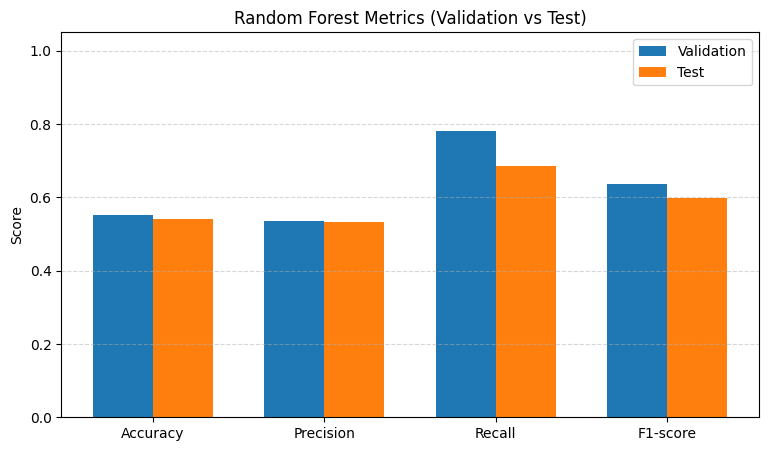

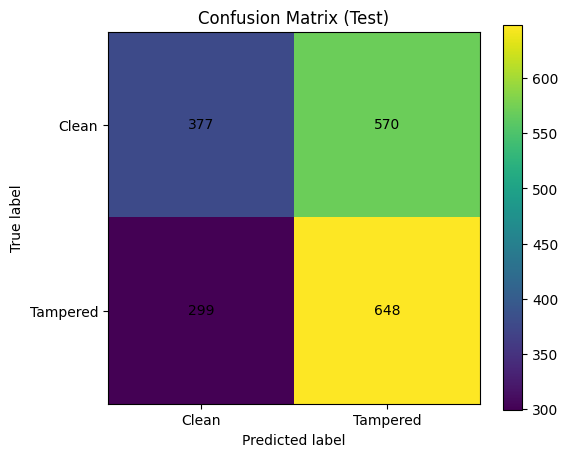


 Saved model: /content/rf_tamper_detector_CT.joblib


In [20]:
!pip install -q scikit-learn scikit-image opencv-python numpy joblib tqdm pydicom

import os
import numpy as np
import cv2
import joblib
from glob import glob
from tqdm import tqdm
import pydicom

from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dataset split folder location
TAMPER_SPLIT_DIR = "/content/splits/ctgan"

# Some limits for the dataset size
# This just caps how many images the algorithm can use depending on the stage of training
MAX_TRAIN_PER_CLASS = 4000
MAX_VAL_PER_CLASS   = 1500
MAX_TEST_PER_CLASS  = 1500
RANDOM_SEED = 42

RF_PARAMS = {
    "n_estimators": 400,          # Number of trees
    "max_depth": None,            # Means unlimited depth
    "random_state": RANDOM_SEED,
    "class_weight": "balanced",
    "n_jobs": -1                  # This will use all CPU cores for the training
}

# This is a feature extraction function (image into numbers)
# This will turn a image into a 12-value feature vector:
# - Basic stats: mean, min, max, median, std
# - Edge density
# - Blur/detail estimate
# - Shannon entropy
# - Texture features from GLCM: contrast, correlation, energy homoeneity
def extract_features(img_u8: np.ndarray) -> np.ndarray:
    if img_u8.ndim != 2:
        img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_BGR2GRAY)

    mean = float(np.mean(img_u8))
    std = float(np.std(img_u8))
    mn = float(np.min(img_u8))
    mx = float(np.max(img_u8))
    median = float(np.median(img_u8))

    # Detects the edges with Canny
    edges = cv2.Canny(img_u8, 50, 150)
    edge_density = float(np.mean(edges > 0))

    # Uses Laplacian Variance to help detect edits using higher detail/sharpness
    lap_var = float(cv2.Laplacian(img_u8, cv2.CV_64F).var())
    ent = float(shannon_entropy(img_u8))

    # Helps reduce the intensity levels down to around 0-15
    # Then filters into a GLCM (gray-level co-occurrency matrix)
    quant = (img_u8 // 16).astype(np.uint8)
    glcm = graycomatrix(
        quant,
        distances=[1, 2],
        angles=[0, np.pi/4, np.pi/2],
        levels=16,
        symmetric=True,
        normed=True
    )

    # Computes the texture properties across the distances and angles
    contrast = float(graycoprops(glcm, "contrast").mean())
    correlation = float(graycoprops(glcm, "correlation").mean())
    energy = float(graycoprops(glcm, "energy").mean())
    homogeneity = float(graycoprops(glcm, "homogeneity").mean())

    return np.array([
        mean, std, mn, mx, median,
        edge_density, lap_var, ent,
        contrast, correlation, energy, homogeneity
    ], dtype=np.float32)

# Loads train/validation/test splits and balances the clean vs tampered datasets
def sample_list(paths, max_n):
    if len(paths) <= max_n:
        return paths
    rng = np.random.default_rng(RANDOM_SEED)
    idx = rng.choice(len(paths), size=max_n, replace=False)
    return [paths[i] for i in idx]

def get_split(split_name, class_name):
    return sorted(glob(os.path.join(TAMPER_SPLIT_DIR, split_name, class_name, "*.dcm")))

def dicom_to_u8(dcm_path: str):
    try:
        ds = pydicom.dcmread(dcm_path, force=True)
        img = ds.pixel_array.astype(np.float32)

        # Apply rescale slope/intercept if present (common in CT)
        slope = float(getattr(ds, "RescaleSlope", 1.0))
        intercept = float(getattr(ds, "RescaleIntercept", 0.0))
        img = img * slope + intercept

        # Robust normalize to 0..255 (percentile-based scaling)
        lo = np.percentile(img, 1)
        hi = np.percentile(img, 99)
        if hi <= lo:
            hi = lo + 1.0
        img = np.clip(img, lo, hi)
        img = (img - lo) / (hi - lo)

        return (img * 255.0).astype(np.uint8)

    except Exception:
        return None

def build_Xy_progress(clean_paths, tampered_paths, tag=""):
    X, y = [], []

    for p in tqdm(clean_paths, desc=f"{tag} CLEAN feature extraction", unit="img"):
        img = dicom_to_u8(p)
        if img is None:
            continue
        X.append(extract_features(img))
        y.append(0)

    for p in tqdm(tampered_paths, desc=f"{tag} TAMPERED feature extraction", unit="img"):
        img = dicom_to_u8(p)
        if img is None:
            continue
        X.append(extract_features(img))
        y.append(1)

    return np.array(X), np.array(y)

def load_split(split_name, max_per_class):
    clean = sample_list(get_split(split_name, "clean"), max_per_class)
    tamp  = sample_list(get_split(split_name, "tampered"), max_per_class)

    n = min(len(clean), len(tamp))
    clean, tamp = clean[:n], tamp[:n]

    print(f"\n{split_name.upper()} -> using {len(clean)} clean + {len(tamp)} tampered")
    return build_Xy_progress(clean, tamp, tag=split_name.upper())

X_train, y_train = load_split("train", MAX_TRAIN_PER_CLASS)
X_val, y_val     = load_split("val", MAX_VAL_PER_CLASS)
X_test, y_test   = load_split("test", MAX_TEST_PER_CLASS)

# Trains the Random Forest Model
print("\nTraining RF...")
model = RandomForestClassifier(**RF_PARAMS) # Creates model using the chosen parameters
model.fit(X_train, y_train)                 # Train the model on the extracted features
print("Done.")

# Prints the accuracy, precision, recall, F1-score, and confusion matrix
def eval_split(name, X, y):
    preds = model.predict(X)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y, preds))
    print(classification_report(y, preds, target_names=["Clean", "Tampered"]))
    print("Confusion Matrix:\n", confusion_matrix(y, preds))

eval_split("VALIDATION", X_val, y_val)
eval_split("TEST", X_test, y_test)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Predict
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Metrics helper
def metrics_dict(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-score": f1_score(y_true, y_pred, zero_division=0),
    }

val_metrics = metrics_dict(y_val, val_preds)
test_metrics = metrics_dict(y_test, test_preds)

print("Validation metrics:", val_metrics)
print("Test metrics:", test_metrics)

# Graph #1: Accuracy / Precision / Recall / F1 (Bar Chart)
labels = list(val_metrics.keys())
val_values = [val_metrics[k] for k in labels]
test_values = [test_metrics[k] for k in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, val_values, width, label="Validation")
plt.bar(x + width/2, test_values, width, label="Test")
plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.title("Random Forest Metrics (Validation vs Test)")
plt.ylabel("Score")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Graph #2: Confusion Matrix (Test)
cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Clean", "Tampered"])
plt.yticks([0, 1], ["Clean", "Tampered"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.colorbar()
plt.show()

# Save model
joblib.dump(model, "/content/rf_tamper_detector_CT.joblib")
print("\n Saved model: /content/rf_tamper_detector_CT.joblib")


5th block of code is the Decision Tree algorithm. This takes the CT-GAN algorithm and trains the AI against that algorithm that will then be saved and can be used to test against other algorithms.

The results will most likely be "mediocre" simply because CT-GAN is a very intense dataset compared to the previous dataset.


TRAIN -> using 4000 clean + 4000 tampered


TRAIN TAMPERED feature extraction: 100%|██████████| 4000/4000 [02:09<00:00, 30.80img/s]



VAL -> using 732 clean + 732 tampered


VAL TAMPERED feature extraction: 100%|██████████| 732/732 [00:25<00:00, 28.23img/s]



TEST -> using 947 clean + 947 tampered


TEST TAMPERED feature extraction: 100%|██████████| 947/947 [00:30<00:00, 31.19img/s]



Training Decision Tree...
Done.

=== VALIDATION ===
Accuracy: 0.5129781420765027
              precision    recall  f1-score   support

       Clean       0.52      0.37      0.43       732
    Tampered       0.51      0.65      0.57       732

    accuracy                           0.51      1464
   macro avg       0.51      0.51      0.50      1464
weighted avg       0.51      0.51      0.50      1464

Confusion Matrix:
 [[272 460]
 [253 479]]

=== TEST ===
Accuracy: 0.48099260823653645
              precision    recall  f1-score   support

       Clean       0.47      0.36      0.41       947
    Tampered       0.48      0.60      0.54       947

    accuracy                           0.48      1894
   macro avg       0.48      0.48      0.47      1894
weighted avg       0.48      0.48      0.47      1894

Confusion Matrix:
 [[342 605]
 [378 569]]
Validation metrics: {'Accuracy': 0.5129781420765027, 'Precision': 0.5101171458998935, 'Recall': 0.6543715846994536, 'F1-score': 0.573309

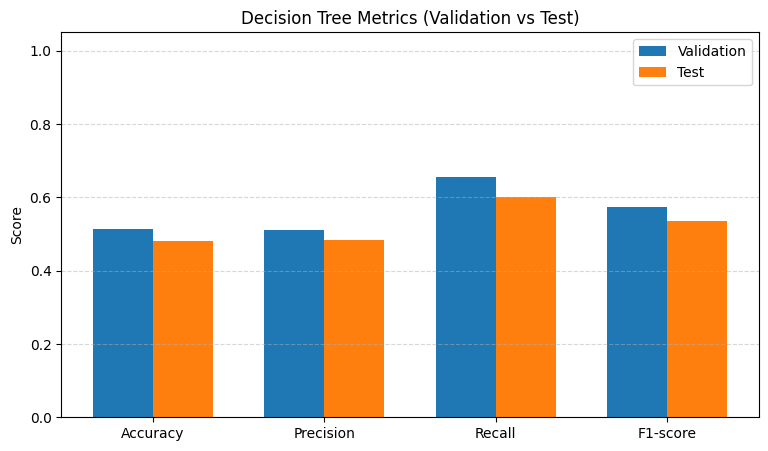

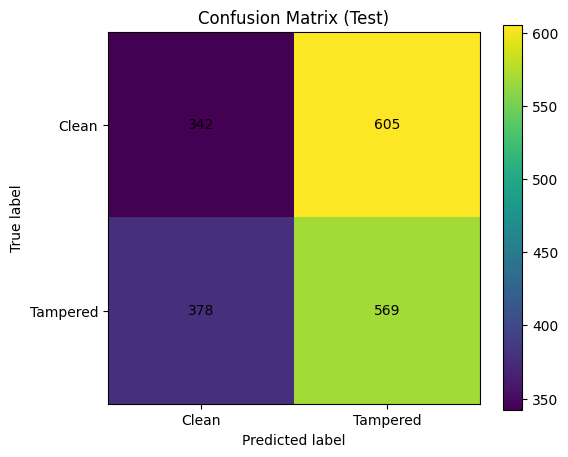


 Saved model: /content/dt_tamper_detector_CT.joblib


In [21]:
!pip install -q scikit-learn scikit-image opencv-python numpy joblib tqdm pydicom

import os
import numpy as np
import cv2
import joblib
from glob import glob
from tqdm import tqdm
import pydicom

from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dataset split folder location
TAMPER_SPLIT_DIR = "/content/splits/ctgan"

# Some limits for the dataset size
# This just caps how many images the algorithm can use depending on the stage of training
MAX_TRAIN_PER_CLASS = 4000
MAX_VAL_PER_CLASS   = 1500
MAX_TEST_PER_CLASS  = 1500
RANDOM_SEED = 42

DT_PARAMS = {
    "max_depth": None,            # Means unlimited depth
    "random_state": RANDOM_SEED,
    "class_weight": "balanced"
}

# This is a feature extraction function (image into numbers)
# This will turn a image into a 12-value feature vector:
# - Basic stats: mean, min, max, median, std
# - Edge density
# - Blur/detail estimate
# - Shannon entropy
# - Texture features from GLCM: contrast, correlation, energy homoeneity
def extract_features(img_u8: np.ndarray) -> np.ndarray:
    if img_u8.ndim != 2:
        img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_BGR2GRAY)

    mean = float(np.mean(img_u8))
    std = float(np.std(img_u8))
    mn = float(np.min(img_u8))
    mx = float(np.max(img_u8))
    median = float(np.median(img_u8))

    # Detects the edges with Canny
    edges = cv2.Canny(img_u8, 50, 150)
    edge_density = float(np.mean(edges > 0))

    # Uses Laplacian Variance to help detect edits using higher detail/sharpness
    lap_var = float(cv2.Laplacian(img_u8, cv2.CV_64F).var())
    ent = float(shannon_entropy(img_u8))

    # Helps reduce the intensity levels down to around 0-15
    # Then filters into a GLCM (gray-level co-occurrency matrix)
    quant = (img_u8 // 16).astype(np.uint8)
    glcm = graycomatrix(
        quant,
        distances=[1, 2],
        angles=[0, np.pi/4, np.pi/2],
        levels=16,
        symmetric=True,
        normed=True
    )

    # Computes the texture properties across the distances and angles
    contrast = float(graycoprops(glcm, "contrast").mean())
    correlation = float(graycoprops(glcm, "correlation").mean())
    energy = float(graycoprops(glcm, "energy").mean())
    homogeneity = float(graycoprops(glcm, "homogeneity").mean())

    return np.array([
        mean, std, mn, mx, median,
        edge_density, lap_var, ent,
        contrast, correlation, energy, homogeneity
    ], dtype=np.float32)

# Loads train/validation/test splits and balances the clean vs tampered datasets
def sample_list(paths, max_n):
    if len(paths) <= max_n:
        return paths
    rng = np.random.default_rng(RANDOM_SEED)
    idx = rng.choice(len(paths), size=max_n, replace=False)
    return [paths[i] for i in idx]

def get_split(split_name, class_name):
    return sorted(glob(os.path.join(TAMPER_SPLIT_DIR, split_name, class_name, "*.dcm")))

def dicom_to_u8(dcm_path: str):
    try:
        ds = pydicom.dcmread(dcm_path, force=True)
        img = ds.pixel_array.astype(np.float32)

        # Apply rescale slope/intercept if present (common in CT)
        slope = float(getattr(ds, "RescaleSlope", 1.0))
        intercept = float(getattr(ds, "RescaleIntercept", 0.0))
        img = img * slope + intercept

        # Robust normalize to 0..255 (percentile-based scaling)
        lo = np.percentile(img, 1)
        hi = np.percentile(img, 99)
        if hi <= lo:
            hi = lo + 1.0
        img = np.clip(img, lo, hi)
        img = (img - lo) / (hi - lo)

        return (img * 255.0).astype(np.uint8)

    except Exception:
        return None

def build_Xy_progress(clean_paths, tampered_paths, tag=""):
    X, y = [], []

    for p in tqdm(clean_paths, desc=f"{tag} CLEAN feature extraction", unit="img"):
        img = dicom_to_u8(p)
        if img is None:
            continue
        X.append(extract_features(img))
        y.append(0)

    for p in tqdm(tampered_paths, desc=f"{tag} TAMPERED feature extraction", unit="img"):
        img = dicom_to_u8(p)
        if img is None:
            continue
        X.append(extract_features(img))
        y.append(1)

    return np.array(X), np.array(y)

def load_split(split_name, max_per_class):
    clean = sample_list(get_split(split_name, "clean"), max_per_class)
    tamp  = sample_list(get_split(split_name, "tampered"), max_per_class)

    n = min(len(clean), len(tamp))
    clean, tamp = clean[:n], tamp[:n]

    print(f"\n{split_name.upper()} -> using {len(clean)} clean + {len(tamp)} tampered")
    return build_Xy_progress(clean, tamp, tag=split_name.upper())

X_train, y_train = load_split("train", MAX_TRAIN_PER_CLASS)
X_val, y_val     = load_split("val", MAX_VAL_PER_CLASS)
X_test, y_test   = load_split("test", MAX_TEST_PER_CLASS)

# Trains the Random Forest Model
print("\nTraining Decision Tree...")
model = DecisionTreeClassifier(**DT_PARAMS) # Creates model using the chosen parameters
model.fit(X_train, y_train)                 # Train the model on the extracted features
print("Done.")

# Prints the accuracy, precision, recall, F1-score, and confusion matrix
def eval_split(name, X, y):
    preds = model.predict(X)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y, preds))
    print(classification_report(y, preds, target_names=["Clean", "Tampered"]))
    print("Confusion Matrix:\n", confusion_matrix(y, preds))

eval_split("VALIDATION", X_val, y_val)
eval_split("TEST", X_test, y_test)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Predict
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

# Metrics helper
def metrics_dict(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-score": f1_score(y_true, y_pred, zero_division=0),
    }

val_metrics = metrics_dict(y_val, val_preds)
test_metrics = metrics_dict(y_test, test_preds)

print("Validation metrics:", val_metrics)
print("Test metrics:", test_metrics)

# Graph #1: Accuracy / Precision / Recall / F1 (Bar Chart)
labels = list(val_metrics.keys())
val_values = [val_metrics[k] for k in labels]
test_values = [test_metrics[k] for k in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, val_values, width, label="Validation")
plt.bar(x + width/2, test_values, width, label="Test")
plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.title("Decision Tree Metrics (Validation vs Test)")
plt.ylabel("Score")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Graph #2: Confusion Matrix (Test)
cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Clean", "Tampered"])
plt.yticks([0, 1], ["Clean", "Tampered"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.colorbar()
plt.show()

# Save model
joblib.dump(model, "/content/dt_tamper_detector_CT.joblib")
print("\n Saved model: /content/dt_tamper_detector_CT.joblib")



6th block of code is the K-Nearest Neighbor algorithm. This takes the CT-GAN algorithm and trains the AI against that algorithm that will then be saved and can be used to test against other algorithms.

The results will most likely be "mediocre" simply because CT-GAN is a very intense dataset compared to the previous dataset.


TRAIN -> using 4000 clean + 4000 tampered


TRAIN TAMPERED feature extraction: 100%|██████████| 4000/4000 [02:07<00:00, 31.41img/s]



VAL -> using 732 clean + 732 tampered


VAL TAMPERED feature extraction: 100%|██████████| 732/732 [00:21<00:00, 33.70img/s]



TEST -> using 947 clean + 947 tampered


TEST TAMPERED feature extraction: 100%|██████████| 947/947 [00:31<00:00, 30.03img/s]



Training KNN...
Done.

=== VALIDATION ===
Accuracy: 0.5724043715846995
              precision    recall  f1-score   support

       Clean       0.60      0.44      0.51       732
    Tampered       0.56      0.71      0.62       732

    accuracy                           0.57      1464
   macro avg       0.58      0.57      0.56      1464
weighted avg       0.58      0.57      0.56      1464

Confusion Matrix:
 [[320 412]
 [214 518]]

=== TEST ===
Accuracy: 0.5116156282998944
              precision    recall  f1-score   support

       Clean       0.51      0.44      0.47       947
    Tampered       0.51      0.58      0.54       947

    accuracy                           0.51      1894
   macro avg       0.51      0.51      0.51      1894
weighted avg       0.51      0.51      0.51      1894

Confusion Matrix:
 [[417 530]
 [395 552]]

Validation metrics: {'Accuracy': 0.5724043715846995, 'Precision': 0.556989247311828, 'Recall': 0.7076502732240437, 'F1-score': 0.6233453670276775}

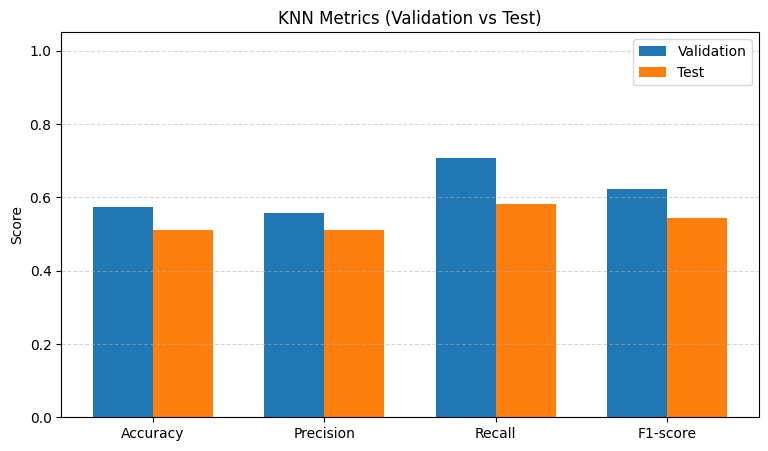

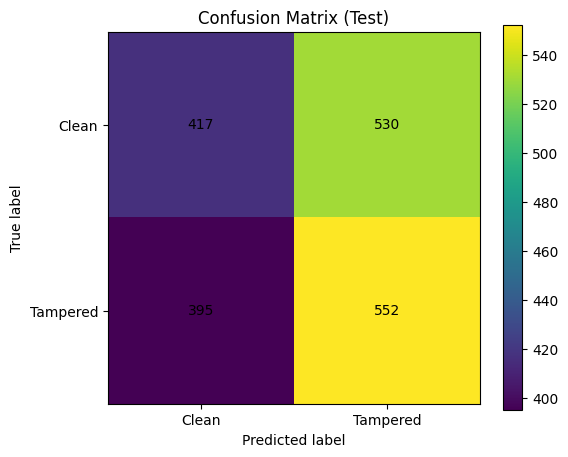


Saved model: /content/knn_tamper_detector_CT.joblib


In [22]:
!pip install -q scikit-learn scikit-image opencv-python numpy joblib tqdm pydicom

import os
import numpy as np
import cv2
import joblib
from glob import glob
from tqdm import tqdm
import pydicom

from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dataset split folder location
TAMPER_SPLIT_DIR = "/content/splits/ctgan"

# Some limits for the dataset size
# This just caps how many images the algorithm can use depending on the stage of training
MAX_TRAIN_PER_CLASS = 4000
MAX_VAL_PER_CLASS   = 1500
MAX_TEST_PER_CLASS  = 1500
RANDOM_SEED = 42

# KNN parameters (tunable)
KNN_PARAMS = {
    "n_neighbors": 7,        # could use: 3, 5, 7, 9, 11
    "weights": "distance",   # "uniform" or "distance"
    "metric": "minkowski",   # default Euclidean (p=2)
    "p": 2
}

# This is a feature extraction function (image into numbers)
# This will turn a image into a 12-value feature vector:
# - Basic stats: mean, min, max, median, std
# - Edge density
# - Blur/detail estimate
# - Shannon entropy
# - Texture features from GLCM: contrast, correlation, energy homoeneity
def extract_features(img_u8: np.ndarray) -> np.ndarray:
    if img_u8.ndim != 2:
        img_u8 = cv2.cvtColor(img_u8, cv2.COLOR_BGR2GRAY)

    mean = float(np.mean(img_u8))
    std = float(np.std(img_u8))
    mn = float(np.min(img_u8))
    mx = float(np.max(img_u8))
    median = float(np.median(img_u8))

    # Detects the edges with Canny
    edges = cv2.Canny(img_u8, 50, 150)
    edge_density = float(np.mean(edges > 0))

    # Uses Laplacian Variance to help detect edits using higher detail/sharpness
    lap_var = float(cv2.Laplacian(img_u8, cv2.CV_64F).var())
    ent = float(shannon_entropy(img_u8))

    # Helps reduce the intensity levels down to around 0-15
    # Then filters into a GLCM (gray-level co-occurrency matrix)
    quant = (img_u8 // 16).astype(np.uint8)
    glcm = graycomatrix(
        quant,
        distances=[1, 2],
        angles=[0, np.pi/4, np.pi/2],
        levels=16,
        symmetric=True,
        normed=True
    )

    # Computes the texture properties across the distances and angles
    contrast = float(graycoprops(glcm, "contrast").mean())
    correlation = float(graycoprops(glcm, "correlation").mean())
    energy = float(graycoprops(glcm, "energy").mean())
    homogeneity = float(graycoprops(glcm, "homogeneity").mean())

    return np.array([
        mean, std, mn, mx, median,
        edge_density, lap_var, ent,
        contrast, correlation, energy, homogeneity
    ], dtype=np.float32)

# Loads train/validation/test splits and balances the clean vs tampered datasets
def sample_list(paths, max_n):
    if len(paths) <= max_n:
        return paths
    rng = np.random.default_rng(RANDOM_SEED)
    idx = rng.choice(len(paths), size=max_n, replace=False)
    return [paths[i] for i in idx]

def get_split(split_name, class_name):
    return sorted(glob(os.path.join(TAMPER_SPLIT_DIR, split_name, class_name, "*.dcm")))

def dicom_to_u8(dcm_path: str):
    try:
        ds = pydicom.dcmread(dcm_path, force=True)
        img = ds.pixel_array.astype(np.float32)

        # Apply rescale slope/intercept if present (common in CT)
        slope = float(getattr(ds, "RescaleSlope", 1.0))
        intercept = float(getattr(ds, "RescaleIntercept", 0.0))
        img = img * slope + intercept

        # Robust normalize to 0..255 (percentile-based scaling)
        lo = np.percentile(img, 1)
        hi = np.percentile(img, 99)
        if hi <= lo:
            hi = lo + 1.0
        img = np.clip(img, lo, hi)
        img = (img - lo) / (hi - lo)

        return (img * 255.0).astype(np.uint8)

    except Exception:
        return None

def build_Xy_progress(clean_paths, tampered_paths, tag=""):
    X, y = [], []

    for p in tqdm(clean_paths, desc=f"{tag} CLEAN feature extraction", unit="img"):
        img = dicom_to_u8(p)
        if img is None:
            continue
        X.append(extract_features(img))
        y.append(0)

    for p in tqdm(tampered_paths, desc=f"{tag} TAMPERED feature extraction", unit="img"):
        img = dicom_to_u8(p)
        if img is None:
            continue
        X.append(extract_features(img))
        y.append(1)

    return np.array(X), np.array(y)

def load_split(split_name, max_per_class):
    clean = sample_list(get_split(split_name, "clean"), max_per_class)
    tamp  = sample_list(get_split(split_name, "tampered"), max_per_class)

    n = min(len(clean), len(tamp))
    clean, tamp = clean[:n], tamp[:n]

    print(f"\n{split_name.upper()} -> using {len(clean)} clean + {len(tamp)} tampered")
    return build_Xy_progress(clean, tamp, tag=split_name.upper())

X_train, y_train = load_split("train", MAX_TRAIN_PER_CLASS)
X_val, y_val     = load_split("val", MAX_VAL_PER_CLASS)
X_test, y_test   = load_split("test", MAX_TEST_PER_CLASS)

# Train KNN (with feature scaling)
print("\nTraining KNN...")
model = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(**KNN_PARAMS))  # Creates model using the chosen parameters
])

model.fit(X_train, y_train) # Train the model on the extracted features
print("Done.")

# Prints the accuracy, precision, recall, F1-score, and confusion matrix
def eval_split(name, X, y):
    preds = model.predict(X)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y, preds))
    print(classification_report(y, preds, target_names=["Clean", "Tampered"]))
    print("Confusion Matrix:\n", confusion_matrix(y, preds))

eval_split("VALIDATION", X_val, y_val)
eval_split("TEST", X_test, y_test)

# Graphs: Metrics + Confusion matrix (separate)
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

def metrics_dict(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-score": f1_score(y_true, y_pred, zero_division=0),
    }

val_metrics = metrics_dict(y_val, val_preds)
test_metrics = metrics_dict(y_test, test_preds)

print("\nValidation metrics:", val_metrics)
print("Test metrics:", test_metrics)

# Graph #1: Accuracy / Precision / Recall / F1 (Bar Chart)
labels = list(val_metrics.keys())
val_values = [val_metrics[k] for k in labels]
test_values = [test_metrics[k] for k in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(9, 5))
plt.bar(x - width/2, val_values, width, label="Validation")
plt.bar(x + width/2, test_values, width, label="Test")
plt.xticks(x, labels)
plt.ylim(0, 1.05)
plt.title("KNN Metrics (Validation vs Test)")
plt.ylabel("Score")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

# Graph #2: Confusion Matrix (Test)
cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(6, 5))
plt.imshow(cm)
plt.title("Confusion Matrix (Test)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], ["Clean", "Tampered"])
plt.yticks([0, 1], ["Clean", "Tampered"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")

plt.colorbar()
plt.show()

# Save model
joblib.dump(model, "/content/knn_tamper_detector_CT.joblib")
print("\nSaved model: /content/knn_tamper_detector_CT.joblib")

